# Joint Winter NKN Faculty Development Program 2019-20 (9-13 Dec 2019)

## Deep Learning & Applications 

**Principal Coordinator** - IIITDM Jabalpur **Co-Principal Coordinator** - NIT Warangal

**Particiapting Academies -** IIITDM Jabalpur, MNIT Jaipur, NIT Patna, NIT Warangal

# Tutorial 4: CNN for Character Classification

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign weights and biases to various layers of the network in the image and be able to differentiate one from the other. CNN mainly consists of stack of Convolutional and pooling layers. At the end of the model Fully connected layers are present. 

# Practice Problem - 

####[ EMNIST ](https://www.nist.gov/itl/products-and-services/emnist-dataset) dataset is a character recognition dataset in which our objective is to train a model which can recognize the category of characters.

**1. Mount the Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
%cd /content/drive/My Drive/

In [ ]:
!pip install mlxtend

In [6]:
from mlxtend.data import loadlocal_mnist
X_train, y_train = loadlocal_mnist(
        images_path='letters/mnist-letters-train-images-idx3-ubyte',
        labels_path='letters/mnist-letters-train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(
        images_path='letters/mnist-letters-test-images-idx3-ubyte',
        labels_path='letters/mnist-letters-test-labels-idx1-ubyte')

In [7]:
import numpy as np

In [8]:
from matplotlib import pyplot
# load dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape,y_test.shape))
X=X_train.reshape(124800,28,28)
# plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

Train: X=(124800, 784), y=(124800,)
Test: X=(20800, 784), y=(20800,)


<Figure size 640x480 with 9 Axes>

In [9]:
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [10]:
np.unique(y_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.
C:\Users\Dhanjal\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dhanjal\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dhanjal\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np

In [12]:
num_images,num_pixels=X_train.shape
num_of_classes=26
print(num_images,num_pixels)


124800 784


In [13]:
X_train=X_train.reshape(124800,28,28,1)

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train/255 
X_test = X_test/255

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(27,activation='softmax'))
model.compile(Adam(lr=0.01), #lr: learning rate
            loss='categorical_crossentropy', #loss function
           metrics=['accuracy'])
print(model.summary())

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=50, 
                    verbose=1, shuffle=1)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               649088    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 27)                3483      
Total params: 652,87

Text(0.5, 0, 'epoch')

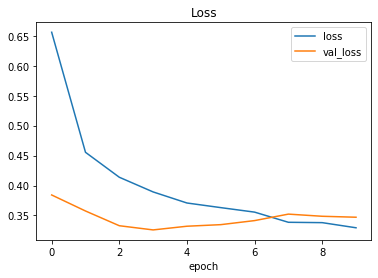

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

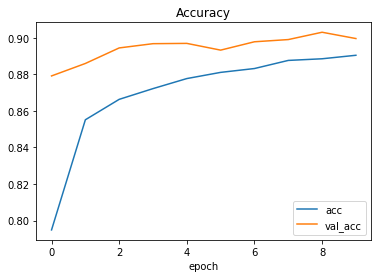

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [19]:
X_test.shape

(20800, 784)

In [20]:
X_test=X_test.reshape(20800,28,28,1)

In [21]:
model.evaluate(X_test,y_test)

20800/20800 [==============================] - 2s 106us/step


[0.37589487445831765, 0.8957211538461538]